In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import pickle

blink = pickle.load(open('test_classification_accuracies_blink_denoise.pkl', 'rb'))
eye = pickle.load(open('test_classification_accuracies_eye_denoise.pkl', 'rb'))
jaw = pickle.load(open('JawMovementDenoiseClassification/test_classification_accuracies_jaw_denoise.pkl', 'rb'))
head = pickle.load(open('HeadMovementDenoiseClassification/test_classification_accuracies_head_denoise.pkl', 'rb'))
baseline = pickle.load(open('test_classification_accuracies_PCA.pkl', 'rb'))

In [3]:
baseline = {int(k[1:3]): v for k, v in baseline.items()}

In [4]:
del blink[33]
del blink[29]
del blink[34]
del eye[33]
del eye[29]
del eye[34]
del head[33]
del head[29]
del head[34]
del jaw[33]
del jaw[29]
del jaw[34]
del baseline[29]
del baseline[34]

In [27]:
df_blink = pd.DataFrame(blink.items(), columns=['subject', 'accuracy'])
df_blink['denoising'] = 'blink'
df_eye = pd.DataFrame(eye.items(), columns=['subject', 'accuracy'])
df_eye['denoising'] = 'eye movement'
df_head = pd.DataFrame(head.items(), columns=['subject', 'accuracy'])
df_head['denoising'] = 'head movement'
df_jaw = pd.DataFrame(jaw.items(), columns=['subject', 'accuracy'])
df_jaw['denoising'] = 'jaw movement'
df_baseline = pd.DataFrame(baseline.items(), columns=['subject', 'accuracy'])
df_baseline['denoising'] = 'baseline'
df = df_baseline.append([
    df_blink, 
    df_eye, 
    # df_head, 
    # df_jaw
])
df

,subject,accuracy,denoising
0,51,0.466667,baseline
1,52,0.583333,baseline
2,46,0.486111,baseline
3,42,0.550000,baseline
4,45,0.508475,baseline
...,...,...,...
44,48,0.500000,eye movement
45,49,0.644068,eye movement
46,50,0.448276,eye movement
47,51,0.508772,eye movement


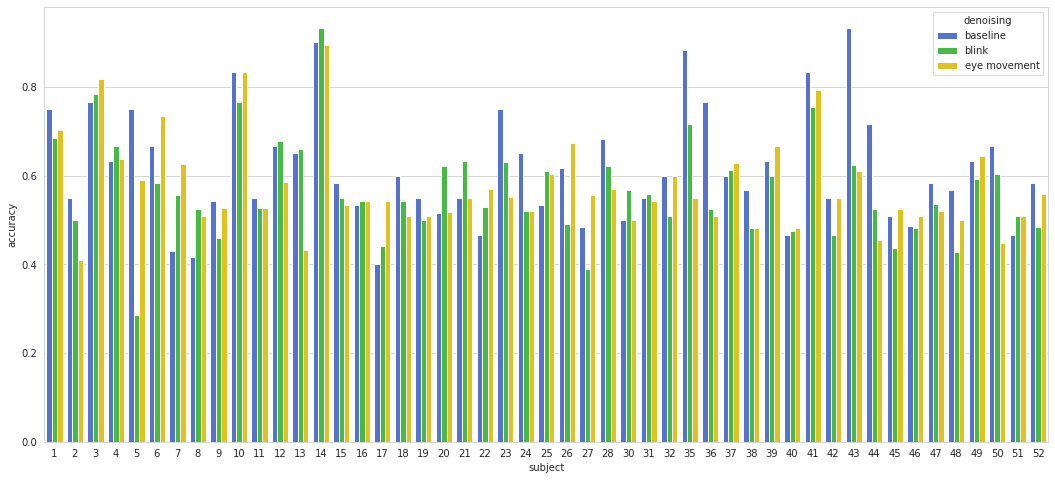

In [28]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18, 8))
g = sns.barplot(x=df.subject, y=df.accuracy, hue=df.denoising, ax=ax, 
    palette={
        'baseline': 'royalblue', 
        'blink': 'limegreen',
        'eye movement': 'gold',
        'head movement': 'orangered',
        'jaw movement': 'orangered'
    }
)
plt.savefig('plt.png', dpi=400)

In [54]:
df_blink.mean()

subject     26.163265
accuracy     0.565485
dtype: float64

In [55]:
df_baseline.mean()

subject     26.163265
accuracy     0.614629
dtype: float64

In [19]:
df_jaw.mean()

subject     26.163265
accuracy     0.542858
dtype: float64

In [20]:
df_head.mean()

subject     26.163265
accuracy     0.545476
dtype: float64

In [29]:
df_eye.mean()

subject     26.163265
accuracy     0.574528
dtype: float64